## Problem Formulation: 

* Input: All Features in the data except id & match columns 
* Output : Whether the 2 persons would match or not 
* Data Mining Function : Classification and prediction 
* Impact : knowing if the couple is goning to match or not 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc-873-dm-w23-a2/Speed Dating Data Description.pdf
/kaggle/input/cisc-873-dm-w23-a2/train.csv
/kaggle/input/cisc-873-dm-w23-a2/test.csv


In [2]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 7.9 MB/s eta 0:00:00


In [3]:
!pip install scikit-optimize

     ------------------------------------ 100.3/100.3 kB 957.7 kB/s eta 0:00:00


In [4]:
#Import liberaries


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score,recall_score, f1_score,precision_recall_curve
sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from time import time
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

## Reading The data

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Exploring the Data

In [4]:
## adjusting pandas print options 

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [5]:
## checking For Null values
train_df.isna().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
fun7_2      4498
intel7_2    4498
attr7_2     4498
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb7_3      4496
shar7_3     4496
shar2_3     4496
attr5_3     4496
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
shar4_3     3838
fun4_3      3838
intel4_3    3838
sinc4_3     3838
attr4_3     3838
attr2_3     3838
sinc2_3     3838
intel2_3    3838
fun2_3      3838
amb2_3      3838
amb4_3      3838
mn_sat      3674
tuition     3365
attr1_3     3105
intel1_3    3105
amb3_3      3105
sinc3_3     3105
intel3_3    3105
shar1_3     3105
amb1_3      3105
fun1_3      3105
fun3_3      3105
attr3_3     3105
sinc1_3     3105
date_3      3105
you_call    3105
them_cal    3105
amb3_s      3069
sinc3_s     3069
intel3_s    3069
fun3_s      3069
attr3_s     3069
shar1_s     2994
amb1_s      2994
fun1_s      2994
intel1_s    2994
sinc1_s     2994
attr1_s     29

In [7]:
## investigating the data types we have
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [6]:
#Copy of the dataset inorder to keep the original one
train_df2 = train_df.copy()

In [9]:
## separating every single datatype in a single DF 
int_cols = train_df2.select_dtypes('int64')
float_cols = train_df2.select_dtypes('float64')
obj_cols = train_df2.select_dtypes('object')

int_cols.shape, float_cols.shape, obj_cols.shape

((5909, 11), (5909, 173), (5909, 8))

In [10]:
train_df2['field'].value_counts()

Business                                                    354
MBA                                                         324
Law                                                         309
Social Work                                                 272
International Affairs                                       189
Electrical Engineering                                      120
Psychology                                                   97
law                                                          90
business                                                     82
Finance                                                      81
Film                                                         67
Mathematics                                                  66
Sociology                                                    65
Biology                                                      61
Engineering                                                  56
Clinical Psychology                     

## visualizing the data

<AxesSubplot:xlabel='match', ylabel='Count'>

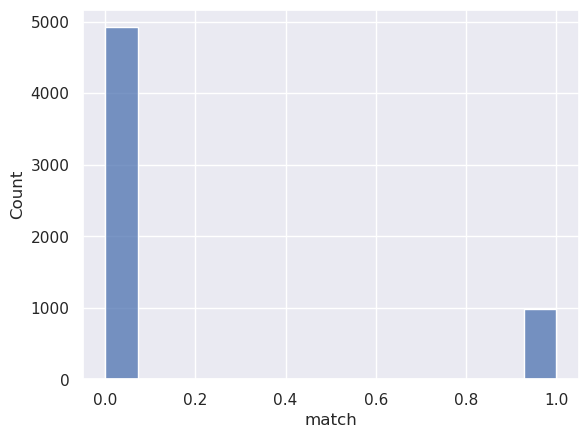

In [10]:
## creating a histogram for taregt column [match] 
sns.histplot(data=train_df2, x='match' )

* from above it's abvious that there is imbalance in target column

<AxesSubplot:xlabel='position', ylabel='Count'>

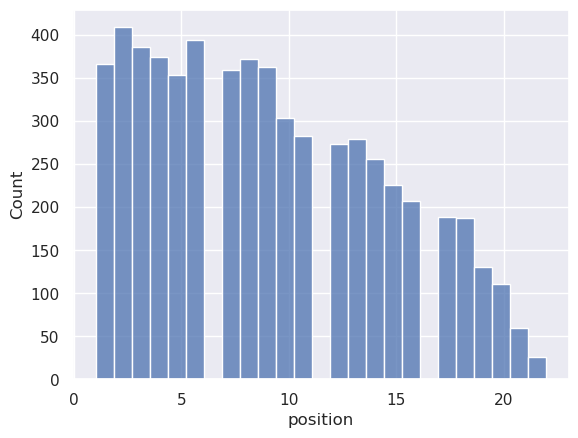

In [11]:
#position column histogram
sns.histplot(data=train_df2,x='position', bins=25)

### converting the Object type as category

In [7]:
train_df2[train_df2.select_dtypes(['object']).columns] = train_df2.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: category(8), float64(173), int64(11)
memory usage: 8.5 MB


## splitting the data

In [9]:
## splitting the data into X [features] Y [labels]
y = train_df2['match'] 
X = train_df2.drop(['match', 'id'], axis=1)
print('shape before any preprocessing', X.shape, y.shape)

shape before any preprocessing (5909, 190) (5909,)


In [10]:
# extracting numeric features and categorical features names

# numeric features 
features_numeric = list(X.select_dtypes(include=['float64', 'int64']))

# categorical features 
features_categorical = list(X.select_dtypes(include=['category']))

print('numeric features: \n', features_numeric)
print('categorical features: \n', features_categorical)

numeric features: 
 ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 's

In [11]:
np.random.seed(42)

# define a pipeline for numeric feature preprocessing
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipeline for categorical feature preprocessing
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


# define the preprocessor 
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

## Saving Prediction Result

In [12]:
# define function to save the csv file of the result after each trial
def result_to_csv(test, classifier, fileName):
  submission = pd.DataFrame()

  submission['id'] = test['id']

  submission['match'] = classifier.predict_proba(test.drop(columns=['id']))[:,1]

  submission.to_csv(fileName, index=False)

## Tuning Pipeline


## RandomForestClassifier Pipeline with GridSearchCV
### observations for trial 0, plan for trial 1:


To find the best hyperparameters that provide the best accuracy, I used RandomForestClassifier through the pipeline that contained the classifier and the preprocessor object built in the preprocessing step with GridSearchCV function.


the trial's hyperparameters included:

* "imputer__strategy": ["mean"] => strategy for filling in the missing data
* The depth limit is [10, 20, 30, 40, 50].

I predicted obtaining the ideal hyperparameter that would generate the best accuracy across all combinations, hit the global optimal, and fall within the given range.

In [17]:
#***Combine the preprocessing steps with a classifier***
#To Apply these steps in X_train and y_train 

#Random Forest Classifier
full_pipeline_RFC = Pipeline(
    steps = [
             ('preprocessing', preprocessor),
              ('my_classifier', RandomForestClassifier(),)
    ]
)

In [18]:
# fitting the pipeline
# The pipeline object can be used like any sk-learn model  
full_pipline = full_pipeline_RFC.fit(X, y)

In [19]:
#Search about the best values of hyperparameters

param_grid = {
    'preprocessing__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators': [20, 30, 40, 50, 60],  
    'my_classifier__max_depth':[10, 20, 30, 40, 50]       
}


grid_search = GridSearchCV(
    full_pipeline_RFC, param_grid, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

#fit the model after getting the optimal hyperparameters values
grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))
     

Fitting 5 folds for each of 25 candidates, totalling 125 fits
best score 0.8448131995919237
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 60, 'preprocessing__num__imputer__strategy': 'mean'}


In [ ]:
# call result_to_csv function 
result_to_csv(test_df, grid_search, 'RandomForestClassifier_Pipeline_with_GridSearchCV.csv')

## GradientBoostingClassifier Pipeline with GridSearchCV
### thoughts and observations for trial 1, plan for trial 2:


To find the optimum hyperparameters that provide the best accuracy, I used GradientBoostingClassifier through the pipeline that contained the classifier and the preprocessor object built in the preprocessing step with GridSearchCV function.


the trial's hyperparameters included:

* "imputer__strategy": ["mean" and "median"] = filling in the missing data strategy
* "n_estimators": [150, 350, 550, 750]
* "max_depth": [5, 7, 9]
*  The learning rate is [0.001, 0.01, 0.1].

I predicted obtaining the ideal hyperparameter that would generate the best accuracy across all combinations, hit the global optimal, and fall within the given range.


Additionally, I expected greater accuracy compared to the earlier trial.

In [13]:
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           GradientBoostingClassifier(),
        )
    ]
)
     

In [14]:
# fitting the pipeline 
full_pipline = full_pipline.fit(X, y)

In [15]:

# specifying the search space (hyperparameters)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators': [150, 350, 550, 750],  
    'my_classifier__max_depth': [ 5, 7, 9],
    'my_classifier__learning_rate': [0.001, 0.01, 0.1]       
}

# three-fold cross-validation
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))
     

Fitting 3 folds for each of 36 candidates, totalling 108 fits
best score 0.8732935129987718
best score {'my_classifier__learning_rate': 0.01, 'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 750, 'preprocessor__num__imputer__strategy': 'mean'}


## XGB classifer with Random search

To find the optimum hyperparameters that provide the best accuracy, I used GradientBoostingClassifier through the pipeline that contained the classifier and the preprocessor object built in the preprocessing step with GridSearchCV function.

thoughts and observations for trial 2, plan for trial 3:


To obtain the best random hyperparameters among all possible hyperparameter combinations within the set number of iterations, I used XGBClassifier through the pipeline that contained the classifier and the preprocessor object built in the preprocessing stage with RandomizedSearchCV function.

the trial's hyperparameters included:

* 'imputer__strategy': ['mean','median','most_frequent'] 
* 'n_estimators': [50, 100, 200] 
*  Maximum depth is [2, 7, 10].

I predicted a lesser level of accuracy in comparison to GridSearchCV with the same classifier. but the oppsite occurs


Additionally, I predicted that among the randomly chosen combinations, the hyperparameters that generate the better accuracy and reach the *local optimal*

In [16]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)

In [17]:
# fitting the pipeline
# The pipeline object can be used like any sk-learn model  
full_pipline = full_pipline.fit(X, y)

In [18]:

# specifying the search space (hyperparameters)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'my_classifier__n_estimators': [50, 100, 200],  
    'my_classifier__max_depth':[2, 7, 10]       
}

# five-fold cross-validation
grid_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=5, verbose=1, n_jobs=-1, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))
     

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best score 0.8803020981801802
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 200, 'my_classifier__max_depth': 7}


In [19]:
# call Result_to_csv 
result_to_csv(test_df, grid_search, 'XGBClassifier_Pipeline_RandomSearchCV.csv')

## XGBClassifier Pipeline with GridSearchCV

thoughts and observations for trial 3, plan for trial 4:

To find the optimum hyperparameters that provide the best accuracy, I used XGBClassifier through the pipeline that includes the classifier and the preprocessor object built in the preprocessing step with GridSearchCV function.


the trial's hyperparameters included:

* 'imputer__strategy': ['mean'','most_frequent']
* 'n_estimators': [50, 100, 200] 
* Maximum depth is [2, 7, 10].

I predicted obtaining the ideal hyperparameter that would generate the best accuracy across all combinations, hit the global optimal, and fall within the given range.


In [20]:

# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)

In [21]:
# fitting the pipeline
full_pipline = full_pipline.fit(X, y)

In [22]:


# specifying the search space (hyperparameters)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'most_frequent'],
    'my_classifier__n_estimators': [50, 100, 200],  
    'my_classifier__max_depth':[2, 5, 10]       
}

# four-fold cross-validation
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=4, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 4 folds for each of 18 candidates, totalling 72 fits
best score 0.8758749282166848
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


In [23]:
result_to_csv(test_df, grid_search, 'XGBClassifier_Pipeline_Gridserah.csv')

## SVM Pipeline with Random SearchCV

thoughts and observations for trial 4, plan for trial 5:
To obtain the best random hyperparameters out of all the possible hyperparameter combinations within the set number of iterations, I used SVM Classifier through a pipeline that contained the classifier and the preprocessor object built in the preprocessing step with the RandomizedSearchCV function.


the trial's hyperparameters included:

* Imputer__Strategy: ["mean," "median," and "most_frequent"]
* Kernel: ["linear," "rbf," "poly,"]
* 'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
* 'gamma': [0.1, 0.5, 0.7, 1],
* degree: [1, 2, 3, 4, 5]

I expected that among the randomly chosen combinations, the hyperparameters that yield the higher accuracy and approach the local ideal (within the given range) would be used.

In [24]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           SVC(probability=True, class_weight='balanced'),
        )
    ]
)

In [25]:

# fitting the pipeline

full_pipline = full_pipline.fit(X, y)

In [26]:

# specifying the search space (hyperparameters)
param = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'my_classifier__kernel': ['linear', 'rbf', 'poly'],
    'my_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'my_classifier__gamma': [0.1, 0.5, 0.7, 1],
    'my_classifier__degree': [1, 2, 3, 4, 5]       
}

# five-fold cross-validation
grid_search = RandomizedSearchCV(
    full_pipline, param, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best score 0.864821674974484
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__kernel': 'poly', 'my_classifier__gamma': 0.1, 'my_classifier__degree': 1, 'my_classifier__C': 0.1}


In [28]:

# save the predicted result to csv file
result_to_csv(test_df, grid_search, 'SVC_Pipeline_with_RandomSearchCV.csv')

## SVM Pipeline with BayesSearch

thoughts and observations for trial 5, plan for trial 6:

To find the best hyperparameters among the specified number of iterations based on using bayesian learning to predict what is the next hyperparamter values we should try given the current trials, I used SVM Classifier through the pipeline that contains the classifier and the preprocessor object created in the preprocessing step with BayesSearchCV function.


the trial's hyperparameters included:

* Imputer__Strategy: ["mean," "median," and "most_frequent"] 
* Kernel: ["linear," "rbf," "poly,"]
* 'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
* 'gamma': [0.1, 0.5, 0.7, 1]
*  degree: [1, 2, 3, 4, 5]

I predicted obtaining an additional degree of accuracy compared to RandomizedSearchCV with the same classifier.


Additionally, I predicted that the hyperparameters would provide the better accuracy among the generated combinations and approach the *local optimal* (within the given range).


In [29]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           SVC(probability=True, class_weight='balanced'),
        )
    ]
)

In [30]:
# fitting the pipeline 
full_pipline = full_pipline.fit(X, y)

In [31]:
# specifying the search space (hyperparameters)
param = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'my_classifier__kernel': ['linear', 'rbf', 'poly'],
    'my_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'my_classifier__gamma': [0.1, 0.5, 0.7, 1],
    'my_classifier__degree': [1, 2, 3, 4, 5]       
}

# three-fold cross-validation
bayes_search = BayesSearchCV(
    full_pipline, param, cv=3, n_iter=30, random_state=0, verbose=1, n_jobs=2, 
    scoring='roc_auc')

bayes_search.fit(X, y)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [35]:
# call saveResult function to save the predicted result to csv file
result_to_csv(test_df, bayes_search, 'SVC_Pipeline_with_BayesSearchCV.csv)

SyntaxError: EOL while scanning string literal (2142406318.py, line 2)

## Questions 

## Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

*  Linear Regression deals with continuous values whereas classification problems mandate discrete values.
*  Sensitive to imbalance data
*  Linear regression produces a linear hypothesis function.but in classification problems, our data show up in a grouped distribution.

## What's a decision tree and how it is different to a logistic regression model?
* **decision tree** is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks it is used to categorize or make predictions based on how a previous set of questions were answered.

* Diffrence between DT and LogReg is : Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. 

## What's the difference between grid search and random search?

* In Grid Search, we try every combination of a preset list of values of the hyper-parameters and choose the best combination based on the cross-validation score. it will give the best combination but it can take a lot of time.

* Random search tries random combinations of a range of values (we have to define the number iterations).It is good at testing a wide range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give the best parameter combination

## What's the difference between bayesian search and random search?
 **The random search :**
* is an uninformed search method that treats iterations independently.
* it runs the risk of missing the ideal set of hyperparameters and forgoing peak model performance.

**Bayseian Search :** 
* is an informed search method, meaning that it learns from previous iterations. The number of trials in this approach is determined by the user.
* the Bayesian optimization method can converge to the optimal hyperparameters. Thus, the best hyperparameters can be obtained without exploring the entire sample space.
* do not have to incorporate randomness and risk missing the optimal solution.